In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [8]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [12]:
#No Missing Values found in the data.

In [17]:
#df.isnull().sum()

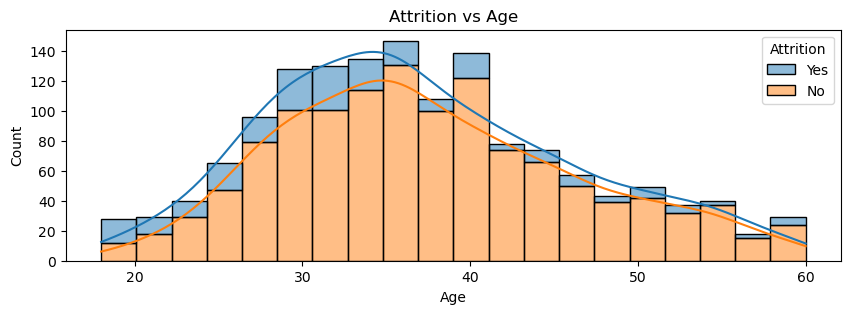

In [19]:
plt.figure(figsize=(10, 3))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=20,kde=True)
plt.title("Attrition vs Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
#Age is impacting the attrition.

In [24]:
# Create a histogram using Plotly Express
fig = px.histogram(df, x="Age", color="Attrition", barmode="stack", nbins=20, histnorm='percent', labels={'Age': 'Age', 'count': 'Count', 'Attrition': 'Attrition'})

# Update layout
fig.update_layout(title="Attrition vs Age", xaxis_title="Age", yaxis_title="Count")
fig.show()

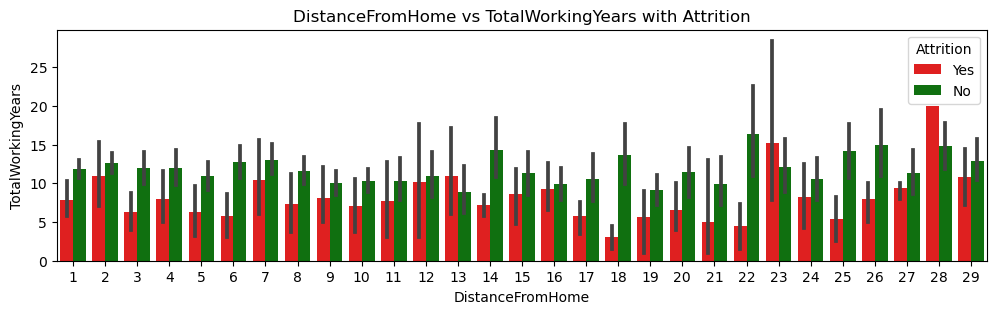

In [44]:
# Define custom colors for Attrition: Yes and Attrition: No
colors = {"Yes": "red", "No": "green"}

# Box plot comparing DistanceFromHome and TotalWorkingYears with hue of Attrition
plt.figure(figsize=(12, 3))
sns.barplot(data=df, x='DistanceFromHome', y='TotalWorkingYears', hue='Attrition', palette=colors)
plt.title('DistanceFromHome vs TotalWorkingYears with Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('TotalWorkingYears')
plt.legend(title='Attrition')
plt.show()

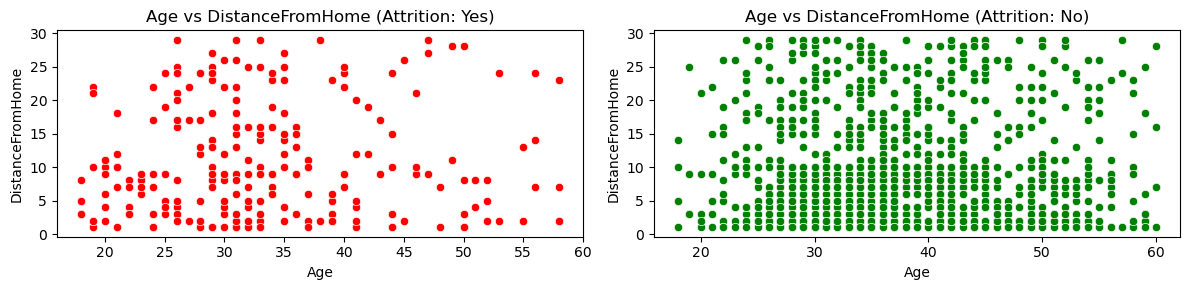

In [43]:
plt.figure(figsize=(12, 3))

# Scatter plot for Attrition: Yes
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['Attrition'] == 'Yes'], x='Age', y='DistanceFromHome',color='red')
plt.title('Age vs DistanceFromHome (Attrition: Yes)')
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

# Scatter plot for Attrition: No
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['Attrition'] == 'No'], x='Age', y='DistanceFromHome',color='green')
plt.title('Age vs DistanceFromHome (Attrition: No)')
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

plt.tight_layout()
plt.show()
#Age factor 28 to 40 contributed more for attrition rate

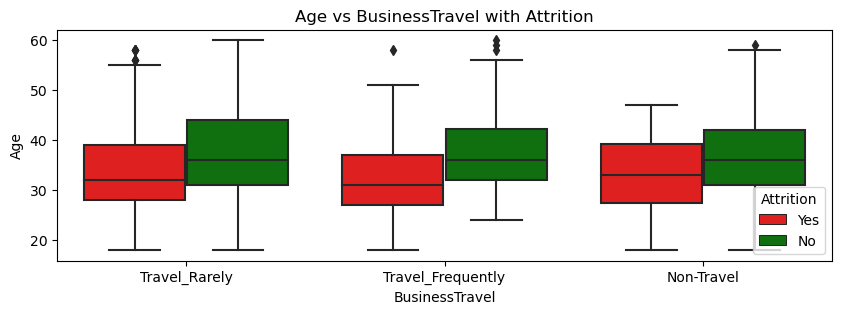

In [39]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='BusinessTravel', y='Age', hue='Attrition',palette=colors)
plt.title('Age vs BusinessTravel with Attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Age')
plt.legend(title='Attrition')
plt.show()
#Age between 27 to 40 shown significant impact on attrition rate, irrespective of user travel.

<Axes: xlabel='OverTime', ylabel='Age'>

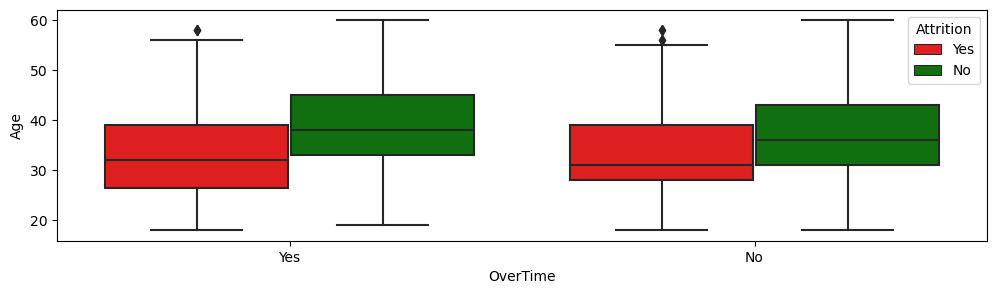

In [61]:
plt.figure(figsize=(12,3))
sns.boxplot(x='OverTime',y='Age',hue='Attrition',data=df,palette=colors)

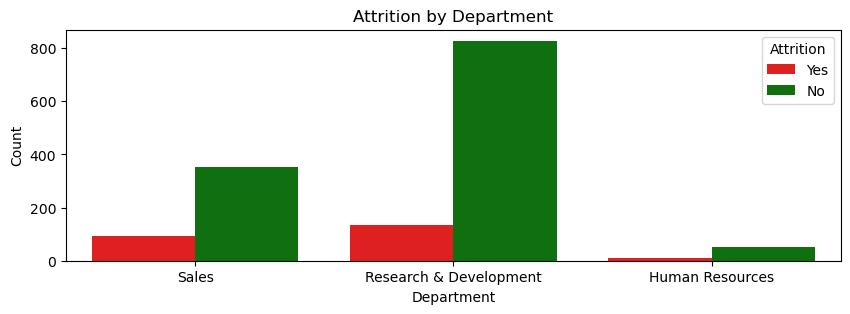

In [70]:
# Count plot for Attrition by Department
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='Department', hue='Attrition',palette=colors)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()
# R&D and Sales department had high attrition rate.

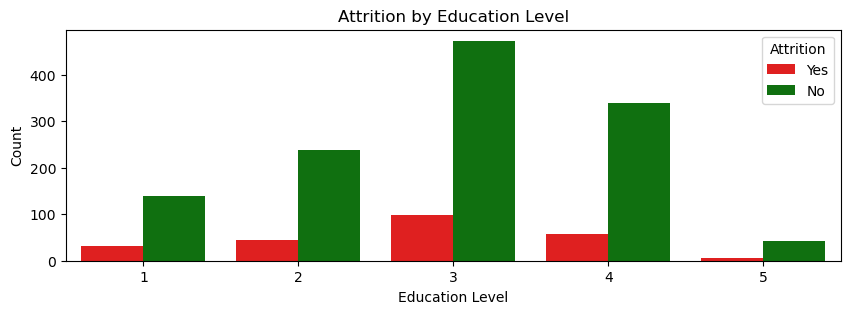

In [76]:
# Plotting Education
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='Education', hue='Attrition',palette=colors)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()
#1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor' 
#except doctos all other education background had significant impact on attrition rate.

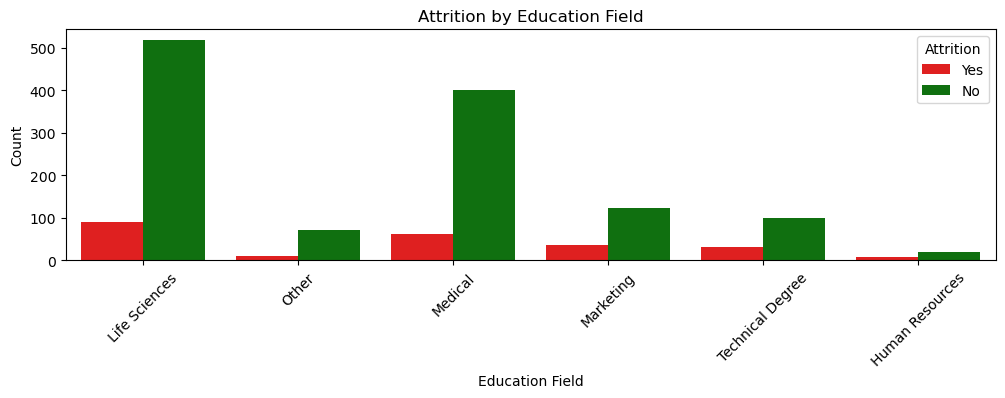

In [77]:
# Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources 
# Plotting EducationField
plt.figure(figsize=(12, 3))
sns.countplot(data=df, x='EducationField', hue='Attrition',palette=colors)
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# This graph correlates with department graph, R&D and sales job roles have more attrition as compared to other roles.
#Attrition is distributed across critical departments.
#R&D : Life sciences, Medical (Important for innovation,product/process improvement)
#Sales : Marketing (Revenue/Growth)

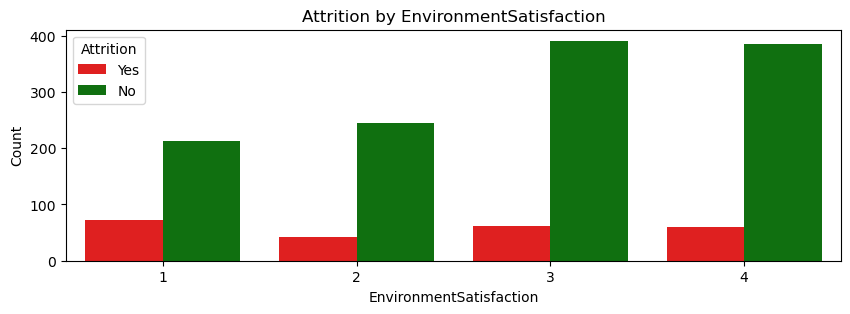

In [85]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition',palette=colors)
plt.title('Attrition by EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
#1 'Low', 2 'Medium', 3 'High', 4 'Very High' 

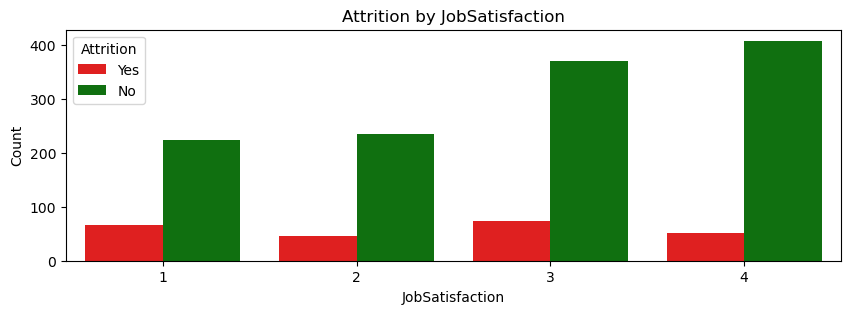

In [87]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition',palette=colors)
plt.title('Attrition by JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
#1 'Low', 2 'Medium', 3 'High', 4 'Very High' 

In [ ]:
#Both JobSatisfaction and EnvironmentSatisfaction seems same. We can drop EnvironmentSatisfaction feature.

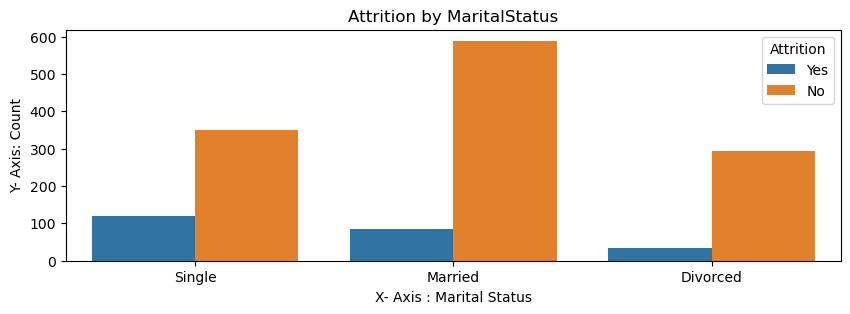

In [101]:
plt.figure(figsize=(10,3))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.title('Attrition by MaritalStatus')
plt.xlabel('X- Axis : Marital Status')
plt.ylabel('Y- Axis: Count')
plt.show()

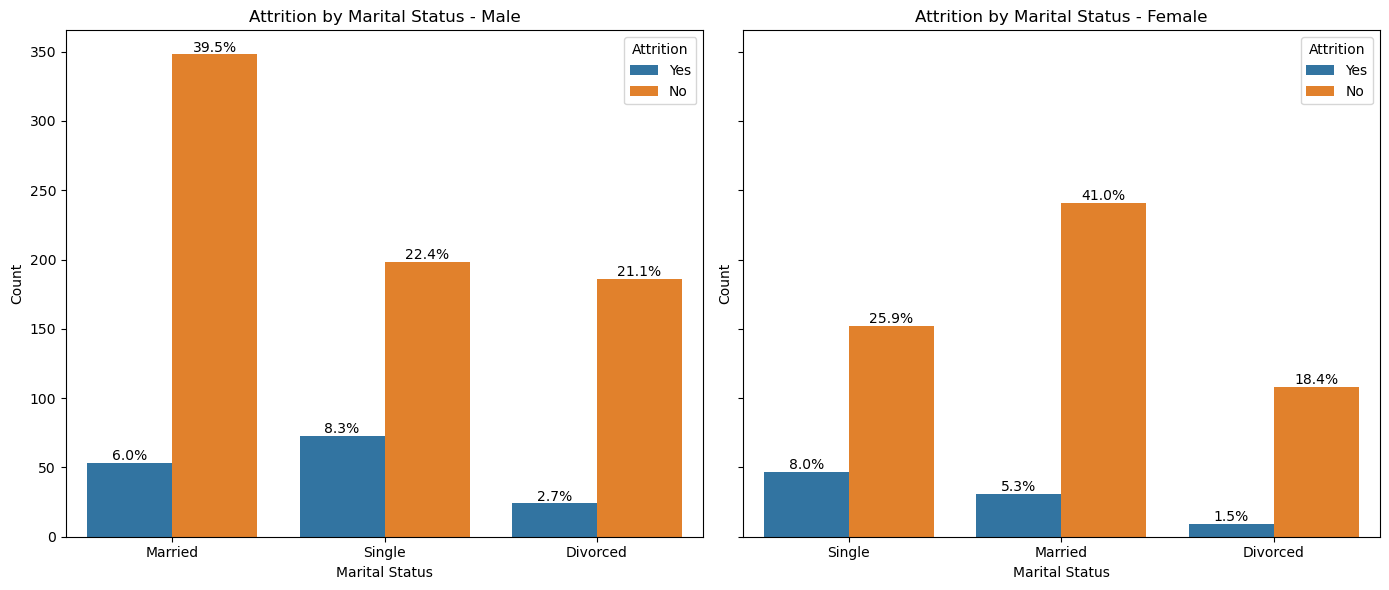

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Male and Female separately
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate total count for each gender
total_male = len(male_data)
total_female = len(female_data)

# Create two separate plots for Male and Female
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Iterate over Male and Female data
for data, gender, ax in zip([male_data, female_data], ['Male', 'Female'], axs):
    # Create the count plot
    sns.countplot(x='MaritalStatus', hue='Attrition', data=data, ax=ax, hue_order=['Yes', 'No'])
    
    # Calculate total count for current gender
    total_count = total_male if gender == 'Male' else total_female
    
    # Add percentage labels inside the bars
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    
    # Set plot title and labels
    ax.set_title(f'Attrition by Marital Status - {gender}')
    ax.set_xlabel('Marital Status')
    ax.set_ylabel('Count')
    ax.legend(title='Attrition')

# Show the plots
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
# Assuming df is your DataFrame containing the dataset

# Calculate Attrition percentage for each combination of Gender and Marital Status
attrition_percentages = df.groupby(['Gender', 'MaritalStatus', 'Attrition']).size().unstack(fill_value=0)

# Calculate total counts for each Gender
total_counts_gender = df.groupby('Gender').size()

# Calculate total counts for each Marital Status
total_counts_marital = df.groupby('MaritalStatus').size()

# Calculate Attrition percentages for each combination of Gender and Marital Status
for gender in df['Gender'].unique():
    for marital_status in df['MaritalStatus'].unique():
        attrition_percent = attrition_percentages.loc[(gender, marital_status), 'Yes'] / total_counts_gender[gender] * 100
        print(f"{gender} - {marital_status}: {attrition_percent:.2f}%")

Female - Single: 7.99%
Female - Married: 5.27%
Female - Divorced: 1.53%
Male - Single: 8.28%
Male - Married: 6.01%
Male - Divorced: 2.72%


In [34]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

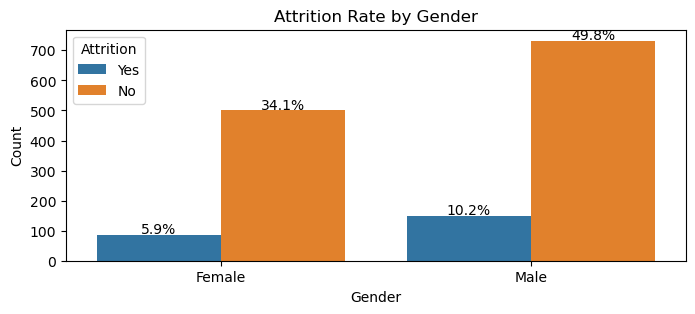

In [37]:
# 1. Attrition rate over Gender wise
plt.figure(figsize=(8, 3))
ax = sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha='center')

plt.show()

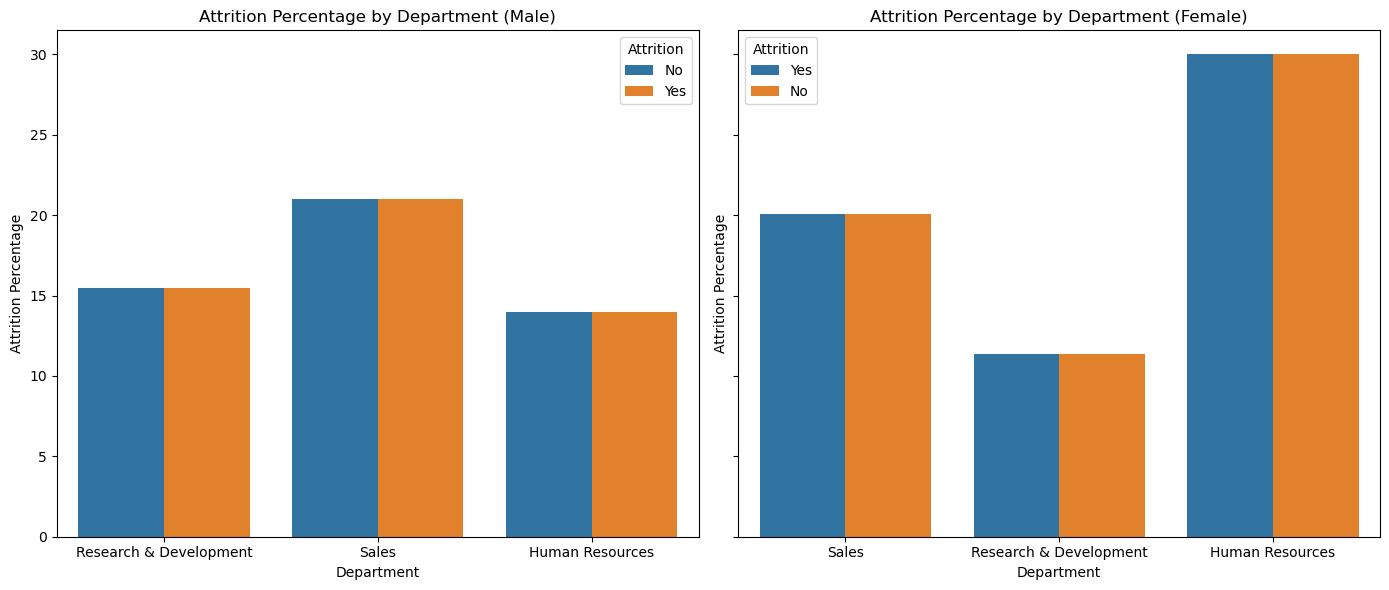

In [53]:
# Calculate attrition percentage
df['Attrition Percentage'] = df.groupby(['Department', 'Gender'])['Attrition'].transform(lambda x: (x.value_counts(normalize=True) * 100).get('Yes', 0))

# Filter data for Male and Female separately
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Male
sns.barplot(x='Department', y='Attrition Percentage', hue='Attrition', data=df_male, ax=axes[0])
axes[0].set_title('Attrition Percentage by Department (Male)')
axes[0].set_ylabel('Attrition Percentage')
axes[0].legend(title='Attrition')

# Plot for Female
sns.barplot(x='Department', y='Attrition Percentage', hue='Attrition', data=df_female, ax=axes[1])
axes[1].set_title('Attrition Percentage by Department (Female)')
axes[1].set_ylabel('Attrition Percentage')
axes[1].legend(title='Attrition')

# Display the plot
plt.tight_layout()
plt.show()

In [51]:
# Group by department and gender and calculate attrition percentage
attrition_percentage = df.groupby(['Department', 'Gender'])['Attrition'].apply(lambda x: (x.value_counts(normalize=True) * 100).get('Yes', 0)).reset_index(name='Attrition Percentage')

print(attrition_percentage)

               Department  Gender  Attrition Percentage
0         Human Resources  Female             30.000000
1         Human Resources    Male             13.953488
2  Research & Development  Female             11.345646
3  Research & Development    Male             15.463918
4                   Sales  Female             20.105820
5                   Sales    Male             21.011673


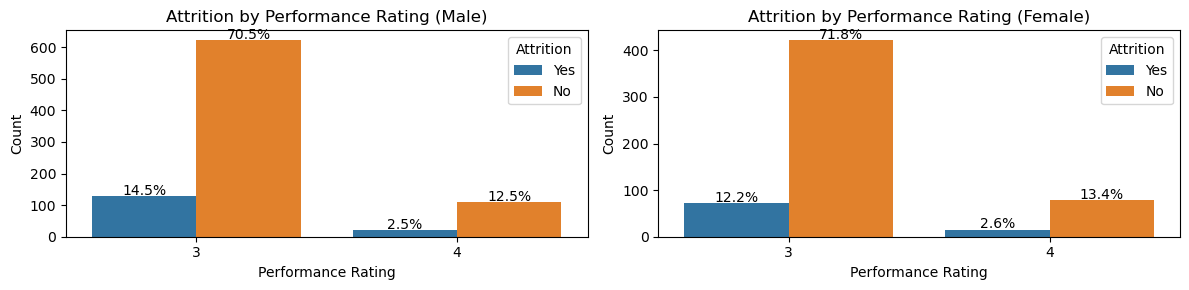

In [60]:
# Filter DataFrame by Gender
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Create subplots for Male and Female
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

# Plot for Male
plt.sca(axes[0])
ax_male = sns.countplot(x='PerformanceRating', hue='Attrition', data=male_df, hue_order=['Yes', 'No'])
plt.title('Attrition by Performance Rating (Male)')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Add percentages inside the bars for Male
total_male = len(male_df)
for p in ax_male.patches:
    height = p.get_height()
    ax_male.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_male:.1%}', ha='center')

# Plot for Female
plt.sca(axes[1])
ax_female = sns.countplot(x='PerformanceRating', hue='Attrition', data=female_df, hue_order=['Yes', 'No'])
plt.title('Attrition by Performance Rating (Female)')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Add percentages inside the bars for Female
total_female = len(female_df)
for p in ax_female.patches:
    height = p.get_height()
    ax_female.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_female:.1%}', ha='center')

plt.tight_layout()
plt.show()

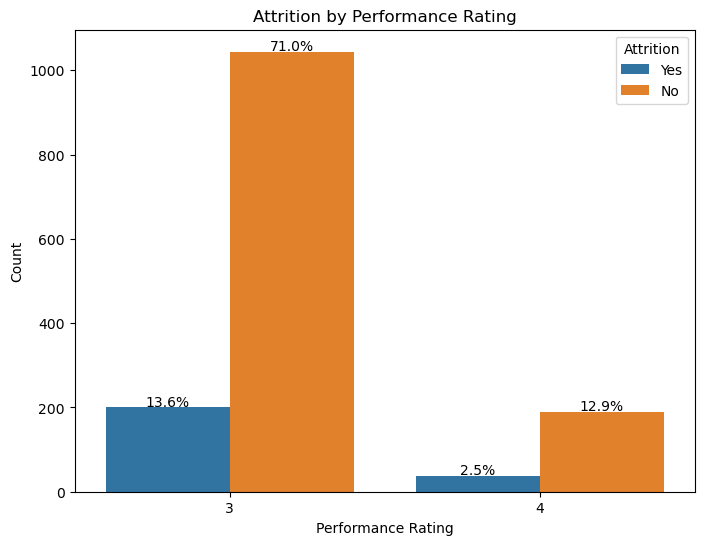

In [61]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PerformanceRating', hue='Attrition', data=df, hue_order=['Yes', 'No'])
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha='center')

plt.show()

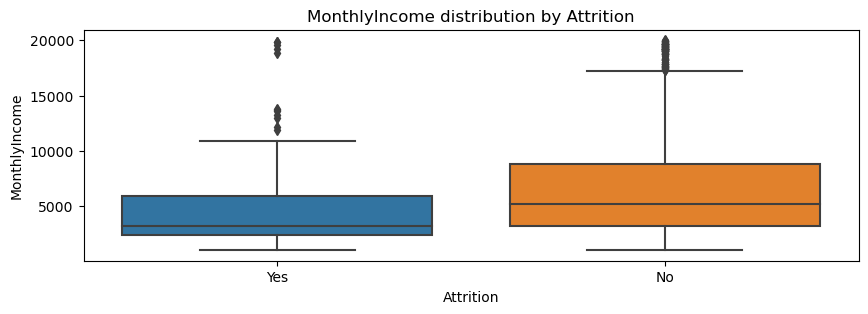

In [127]:
# Box plot for MonthlyIncome
plt.figure(figsize=(10,3))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()
#Including Overtime, commission, bonus

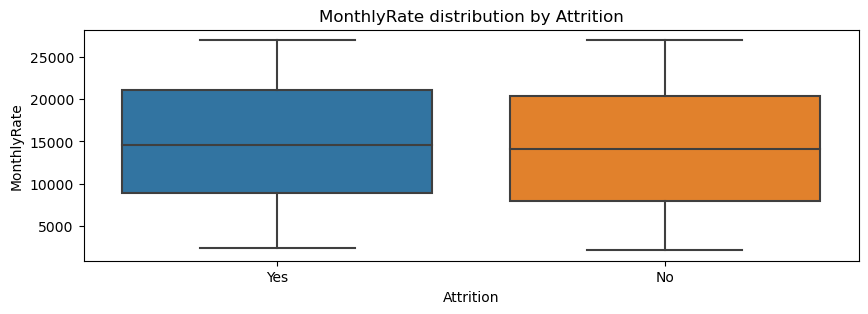

In [129]:
# Box plot for MonthlyRate
plt.figure(figsize=(10,3))
sns.boxplot(x='Attrition', y='MonthlyRate', data=df)
plt.title('MonthlyRate distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyRate')
plt.show()
#fixed monthly salary

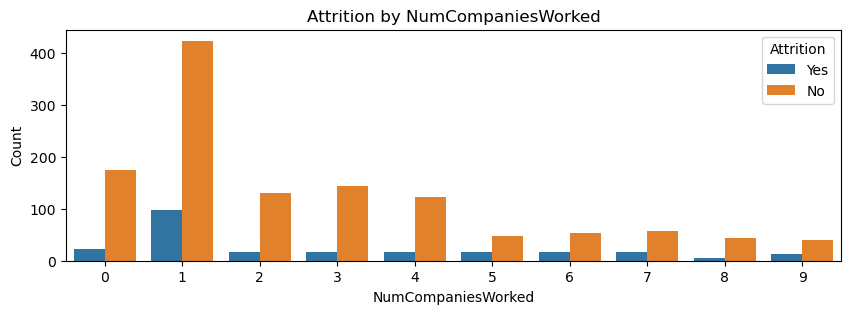

In [131]:
# Count plot for NumCompaniesWorked over Attrition
plt.figure(figsize=(10,3))
sns.countplot(data=df, x='NumCompaniesWorked', hue='Attrition')
plt.title('Attrition by NumCompaniesWorked')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
# If employee joined or worked in one employer before, there is chance of resign/termination. 
#need to analyse about their performance, job satisfaction, monthly income

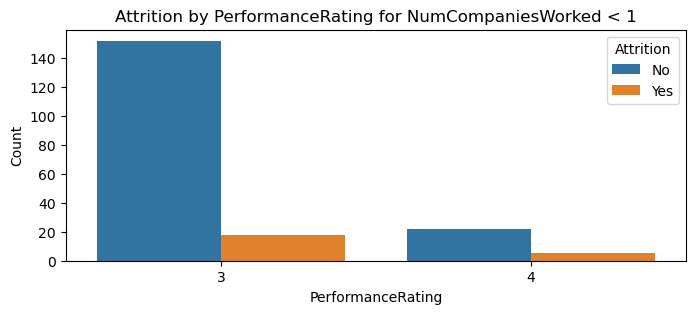

In [136]:
# Filter data for employees with 'NumCompaniesWorked' less than 1
filtered_df = df[df['NumCompaniesWorked'] < 1]

# Set up the figure
plt.figure(figsize=(8, 3))

# Count plot for PerformanceRating over Attrition for employees with 'NumCompaniesWorked' less than 1
sns.countplot(data=filtered_df, x='PerformanceRating', hue='Attrition')
plt.title('Attrition by PerformanceRating for NumCompaniesWorked < 1')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
# 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

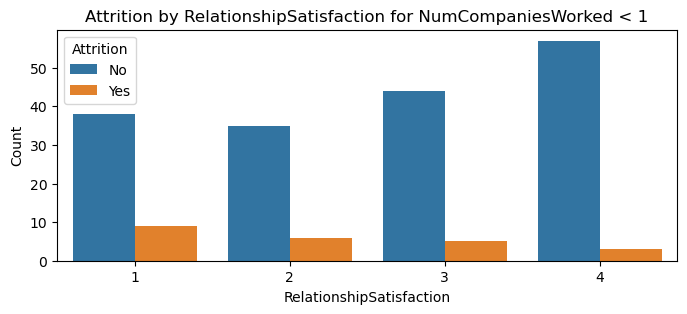

In [135]:
# Filter data for employees with 'NumCompaniesWorked' less than 1
filtered_df = df[df['NumCompaniesWorked'] < 1]

# Set up the figure
plt.figure(figsize=(8, 3))

# Count plot for RelationshipSatisfaction over Attrition for employees with 'NumCompaniesWorked' less than 1
sns.countplot(data=filtered_df, x='RelationshipSatisfaction', hue='Attrition')
plt.title('Attrition by RelationshipSatisfaction for NumCompaniesWorked < 1')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
# 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

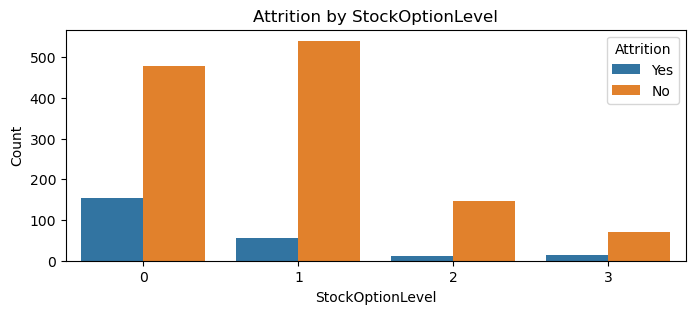

In [139]:
# Set up the figure
plt.figure(figsize=(8, 3))

# Count plot for StockOptionLevel over Attrition
sns.countplot(data=df, x='StockOptionLevel', hue='Attrition')
plt.title('Attrition by StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
# 0 No Stock, 1 lowest level, 2 moderate level, 3 highest level

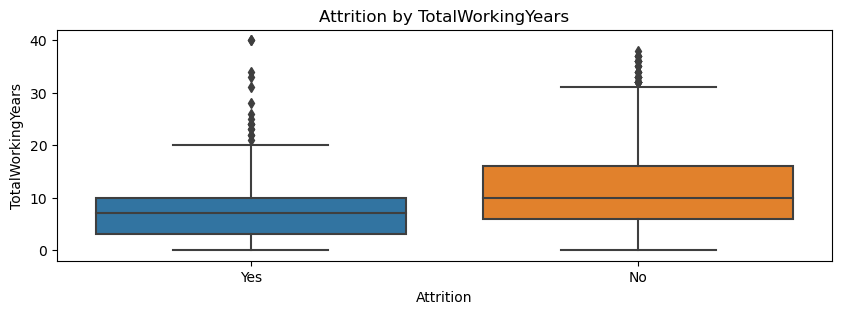

In [141]:
# Set up the figure
plt.figure(figsize=(10, 3))

# Box plot for TotalWorkingYears over Attrition
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Attrition by TotalWorkingYears')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.show()

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

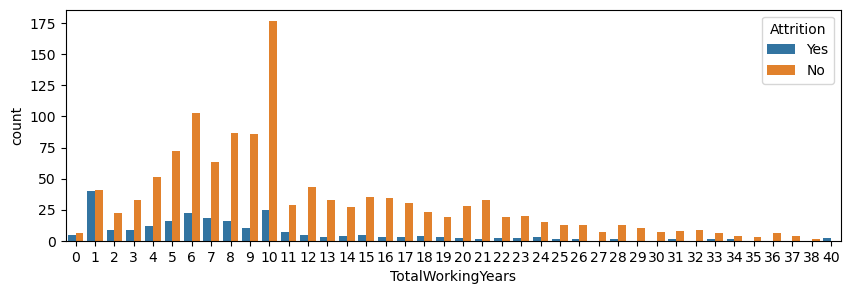

In [146]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='TotalWorkingYears',hue='Attrition')

<Axes: xlabel='YearsAtCompany', ylabel='count'>

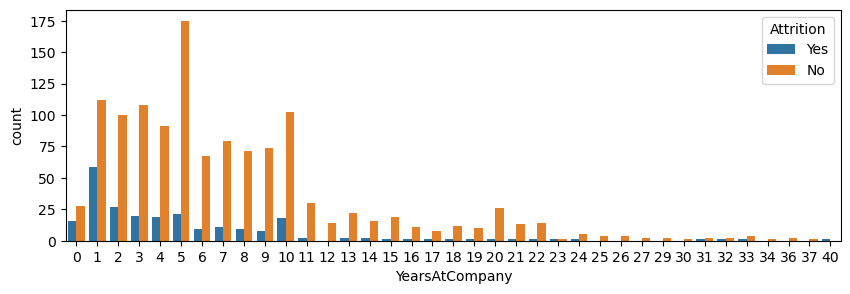

In [150]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='YearsAtCompany',hue='Attrition')

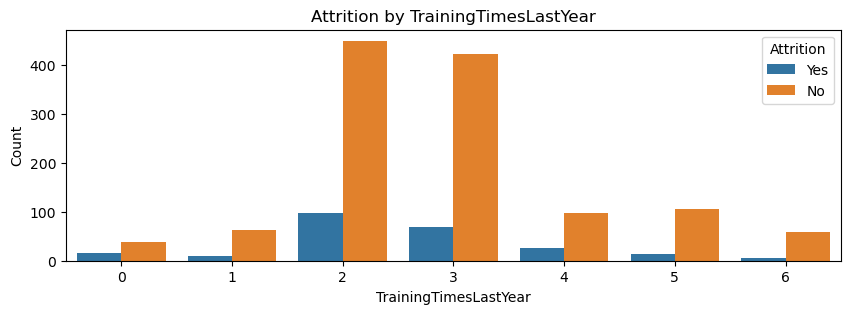

In [145]:
# Set up the figure
plt.figure(figsize=(10, 3))

# Count plot for TrainingTimesLastYear over Attrition
sns.countplot(data=df, x='TrainingTimesLastYear', hue='Attrition')
plt.title('Attrition by TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

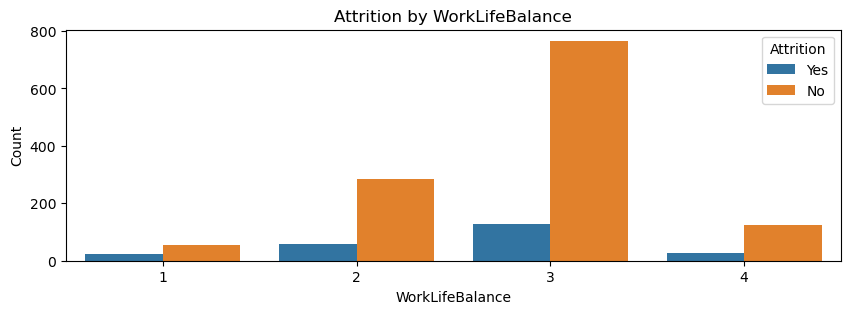

In [149]:
# Set up the figure
plt.figure(figsize=(10, 3))

# Count plot for WorkLifeBalance over Attrition
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
#1 'Bad' 2 'Good' 3 'Better' 4 'Best'

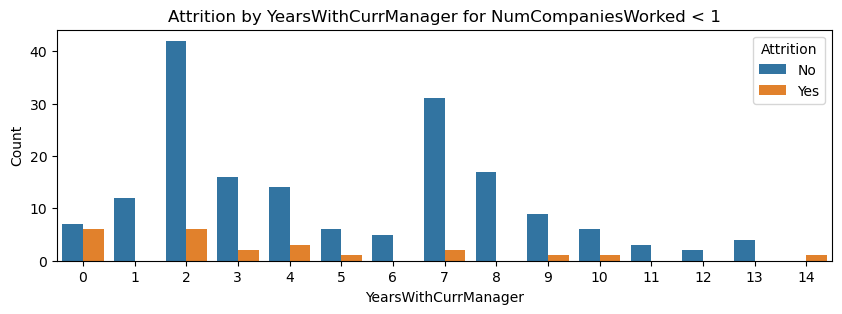

In [137]:
# Filter data for employees with 'NumCompaniesWorked' less than 1
filtered_df = df[df['NumCompaniesWorked'] < 1]

# Set up the figure
plt.figure(figsize=(10, 3))

# Count plot for YearsWithCurrManager over Attrition for employees with 'NumCompaniesWorked' less than 1
sns.countplot(data=filtered_df, x='YearsWithCurrManager', hue='Attrition')
plt.title('Attrition by YearsWithCurrManager for NumCompaniesWorked < 1')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

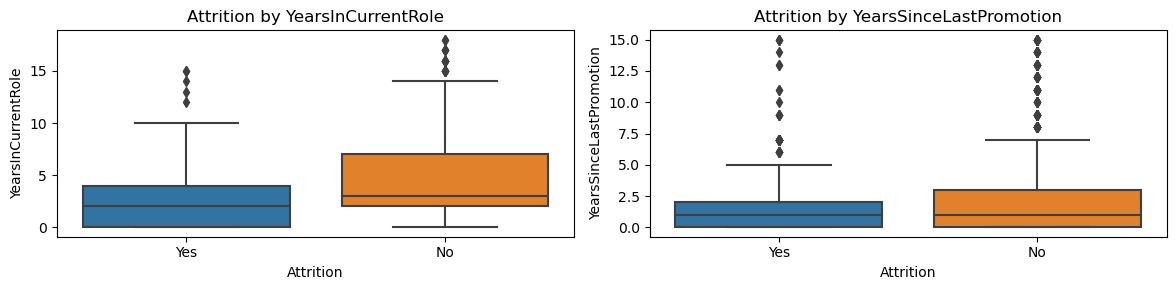

In [152]:
# Set up the figure with subplots
plt.figure(figsize=(12, 3))

# Box plot for YearsInCurrentRole over Attrition
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Attrition by YearsInCurrentRole')
plt.xlabel('Attrition')
plt.ylabel('YearsInCurrentRole')

# Box plot for YearsSinceLastPromotion over Attrition
plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Attrition by YearsSinceLastPromotion')
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')

plt.tight_layout()
plt.show()

In [94]:
#Features like DailyRate, EmpCount, EmpNo, Over18, Standard hours are constant and not shown any significant impact on target feature. 
#Removing these features

# List of features to drop
features_to_drop = ['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EnvironmentSatisfaction']

# Drop the features from the DataFrame
df = df.drop(columns=features_to_drop,axis=1)

#Data Visulisation still left

In [25]:
import plotly.express as px
# Create a bar plot using Plotly Express
fig = px.bar(df, x='Gender', y='MonthlyIncome', color='Attrition', 
             hover_data=['Gender', 'MonthlyIncome', 'Attrition'], 
             labels={'MonthlyIncome': 'Monthly Income'}, 
             title='Monthly Income by Gender and Attrition')
fig.show()

In [26]:
# Create a bar plot using Plotly Express
fig = px.bar(df, x='Gender', y='MonthlyRate', color='Attrition', 
             hover_data=['Gender', 'MonthlyRate', 'Attrition'], 
             labels={'MonthlyRate': 'Monthly Rate'}, 
             title='Monthly Rate by Gender and Attrition')
fig.show()

In [27]:
# Calculate average salary by 'Gender' and 'Attrition'
avg_salary = df.groupby(['Gender', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(avg_salary, x='Gender', y='MonthlyIncome', color='Attrition', 
             labels={'MonthlyIncome': 'Average Monthly Income'}, 
             title='Average Monthly Income by Gender and Attrition')

# Show the plot
fig.show()

In [28]:
# Calculate average salary by 'Gender' and 'Attrition'
avg_salary = df.groupby(['Gender', 'Attrition'])['MonthlyRate'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(avg_salary, x='Gender', y='MonthlyRate', color='Attrition', 
             labels={'MonthlyRate': 'Average Monthly Rate'}, 
             title='Average Monthly Rate by Gender and Attrition')

# Show the plot
fig.show()
#Monthly Rate is not impacting the attrition rate that mush as compared with monthlyIncome.

In [6]:
# Define the age ranges and corresponding categories
age_ranges = [0, 14, 27, 43, 59, 78, 96]
age_labels = ['Alpha', 'Gen Z', 'Gen Y', 'Gen X', 'Baby Boomers', 'Silent_Gen']

# Create the 'C_Age' column based on age ranges
df['C_Age'] = pd.cut(df['Age'], bins=age_ranges, labels=age_labels)

# Display the first few rows of the dataframe with the new column
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  ...       

In [7]:
# Group by 'C_Age' and 'Attrition' and count the occurrences
age_attrition_counts = df.groupby(['C_Age', 'Attrition']).size().reset_index(name='Count')


In [8]:
age_attrition_counts

C_Age Attrition  Count
0          Alpha        No      0
1          Alpha       Yes      0
2          Gen Z        No    151
3          Gen Z       Yes     59
4          Gen Y        No    777
5          Gen Y       Yes    136
6          Gen X        No    300
7          Gen X       Yes     42
8   Baby Boomers        No      5
9   Baby Boomers       Yes      0
10    Silent_Gen        No      0
11    Silent_Gen       Yes      0

In [ ]:
# Create a bar plot using Plotly Express with KDE enabled
fig = px.histogram(age_attrition_counts, x='C_Age', y='Count', color='Attrition',
                   labels={'Count': 'Number of Employees'},
                   title='Distribution of C_Age over Attrition',
                   histfunc='sum',  # Use 'sum' to aggregate counts
                   barmode='group', # Group bars for different Attrition values
                   marginal='rug',  # Add rug plot for KDE
                   opacity=0.7)     # Set opacity for better visualization

# Show the plot
fig.show()
fig.write_image('Distribution of C_Age over Attrition.png')

In [188]:
df[df['Age']>=60]

Age Attrition     BusinessTravel              Department  \
411    60        No      Travel_Rarely  Research & Development   
427    60        No  Travel_Frequently                   Sales   
536    60        No      Travel_Rarely                   Sales   
879    60        No      Travel_Rarely                   Sales   
1209   60        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  Gender  HourlyRate  \
411                  7          3  Life Sciences  Female          41   
427                 28          3      Marketing  Female          80   
536                 16          4      Marketing    Male          84   
879                  7          4      Marketing    Male          52   
1209                 1          4        Medical    Male          92   

      JobInvolvement  ...  RelationshipSatisfaction StockOptionLevel  \
411                3  ...                         4                0   
427                2  ...                         4                0   
536                3  ...                         4                0   
879                4  ...                         2                1   
1209               1  ...                         3                1   

      TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
411                  33                     5                1   
427                  22                     5                4   
536                  10                     1                3   
879                  12                     3                3   
1209                 19                     2                4   

      YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
411               29                   8                      11   
427               18                  13                      13   
536                2                   2                       2   
879               11                   7                       1   
1209               1                   0                       0   

      YearsWithCurrManager         C_Age  
411                     10  Baby Boomers  
427                     11  Baby Boomers  
536                      2  Baby Boomers  
879                      9  Baby Boomers  
1209                     0  Baby Boomers  

[5 rows x 30 columns]

In [10]:
# Visualization 1: C_Age vs NumCompaniesWorked over Attrition
fig1 = px.box(df, x='C_Age', y='NumCompaniesWorked', color='Attrition',
              title='C_Age vs NumCompaniesWorked over Attrition',
              labels={'NumCompaniesWorked': 'Number of Companies Worked'})
fig1.show()

In [11]:
# Visualization 2: C_Age vs average NumCompaniesWorked over Attrition
avg_num_companies = df.groupby(['C_Age', 'Attrition'])['NumCompaniesWorked'].mean().reset_index()
fig2 = px.bar(avg_num_companies, x='C_Age', y='NumCompaniesWorked', color='Attrition',
               title='C_Age vs Average NumCompaniesWorked over Attrition',
               labels={'NumCompaniesWorked': 'Average Number of Companies Worked'})
fig2.show()

In [4]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.index,
                y=corr_matrix.columns,
                title="Correlation Matrix Heatmap")
fig.update_layout(width=1000, height=800)
fig.update_traces(colorscale='magma')


# Show the plot
fig.show()

In [206]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  Gender  HourlyRate  JobInvolvement  ...  \
0          2  Life Sciences  Female          94               3  ...   
1          1  Life Sciences    Male          61               2  ...   
2          2          Other    Male          92               2  ...   
3          4  Life Sciences  Female          56               3  ...   
4          1        Medical    Male          40               3  ...   

   RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
0                         1                0                  8   
1                         4                1                 10   
2                         2                0                  7   
3                         3                0                  8   
4                         4                1                  6   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                     0                1               6                   4   
1                     3                3              10                   7   
2                     3                3               0                   0   
3                     3                3               8                   7   
4                     3                3               2                   2   

  YearsSinceLastPromotion  YearsWithCurrManager  C_Age  
0                       0                     5  Gen Y  
1                       1                     7  Gen X  
2                       0                     0  Gen Y  
3                       3                     0  Gen Y  
4                       2                     2  Gen Z  

[5 rows x 30 columns]

# Converting Categorical Features into Numerical using One_Hot_Encoding

In [207]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the encoded dataframe
df_encoded.head()

Age  DistanceFromHome  Education  HourlyRate  JobInvolvement  JobLevel  \
0   41                 1          2          94               3         2   
1   49                 8          1          61               2         2   
2   37                 2          2          92               2         1   
3   33                 3          4          56               3         1   
4   27                 2          1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  ...  \
0                4           5993        19479                   8  ...   
1                2           5130        24907                   1  ...   
2                3           2090         2396                   6  ...   
3                3           2909        23159                   1  ...   
4                2           3468        16632                   9  ...   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                  False                  True        False          True  
1                   True                 False         True         False  
2                  False                  True        False          True  
3                   True                 False        False          True  
4                   True                 False         True         False  

[5 rows x 52 columns]

In [218]:
df_encoded.drop(['C_Age'],axis=1,inplace=True)

In [219]:
df_encoded

Age  DistanceFromHome  Education  HourlyRate  JobInvolvement  JobLevel  \
0      41                 1          2          94               3         2   
1      49                 8          1          61               2         2   
2      37                 2          2          92               2         1   
3      33                 3          4          56               3         1   
4      27                 2          1          40               3         1   
...   ...               ...        ...         ...             ...       ...   
1465   36                23          2          41               4         2   
1466   39                 6          1          42               2         3   
1467   27                 4          3          87               4         2   
1468   49                 2          3          63               2         2   
1469   34                 8          3          82               4         2   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  ...  \
0                   4           5993        19479                   8  ...   
1                   2           5130        24907                   1  ...   
2                   3           2090         2396                   6  ...   
3                   3           2909        23159                   1  ...   
4                   2           3468        16632                   9  ...   
...               ...            ...          ...                 ...  ...   
1465                4           2571        12290                   4  ...   
1466                1           9991        21457                   4  ...   
1467                2           6142         5174                   1  ...   
1468                2           5390        13243                   2  ...   
1469                3           4404        10228                   2  ...   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                              False                      False   
4                              False                      False   
...                              ...                        ...   
1465                           False                      False   
1466                           False                      False   
1467                            True                      False   
1468                           False                      False   
1469                           False                      False   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                          False                     True   
1                           True                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   
...                          ...                      ...   
1465                       False                    False   
1466                       False                    False   
1467                       False                    False   
1468                       False                     True   
1469                       False                    False   

      JobRole_Sales Representative  MaritalStatus_Divorced  \
0                            False                   False   
1                            False                   False   
2                            False                   False   
3                            False                   False   
4                            False                   False   
...                            ...                     ...   
1465                         False                   False   
1466                         False                   False   
1467        

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Attrition_No', 'Attrition_Yes'], axis=1)
y = df_encoded['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8639455782312925


C:\Users\BALAJIKRISHNANETHI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Feature ranking:
1. feature 7 (0.076126)
2. feature 0 (0.054720)
3. feature 8 (0.052400)
4. feature 14 (0.049687)
5. feature 3 (0.048682)
6. feature 1 (0.043943)
7. feature 48 (0.040951)
8. feature 47 (0.039471)
9. feature 17 (0.039454)
10. feature 9 (0.035369)
11. feature 10 (0.034128)
12. feature 19 (0.030701)
13. feature 18 (0.030286)
14. feature 20 (0.029843)
15. feature 6 (0.029420)
16. feature 15 (0.028158)
17. feature 5 (0.028147)
18. feature 13 (0.027088)
19. feature 46 (0.024889)
20. feature 4 (0.024369)
21. feature 16 (0.023463)
22. feature 12 (0.022314)
23. feature 2 (0.019773)
24. feature 22 (0.014562)
25. feature 26 (0.010600)
26. feature 43 (0.010390)
27. feature 37 (0.010341)
28. feature 23 (0.009867)
29. feature 45 (0.009150)
30. feature 33 (0.008749)
31. feature 34 (0.008406)
32. feature 25 (0.008230)
33. feature 30 (0.008215)
34. feature 42 (0.008037)
35. feature 32 (0.007392)
36. feature 29 (0.007273)
37. feature 28 (0.006669)
38. feature 44 (0.006547)
39. feature 41

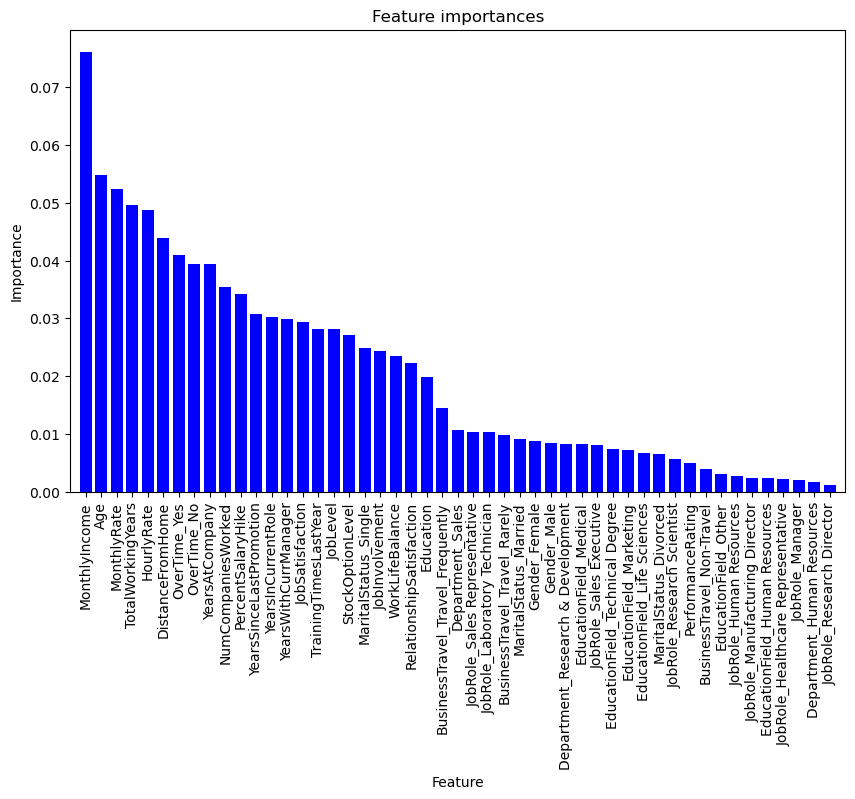

In [221]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [224]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Attrition_No', 'Attrition_Yes'], axis=1)
y = df_encoded['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8673469387755102


In [233]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(['Attrition_No', 'Attrition_Yes'], axis=1)

# Predict probabilities of attrition for each employee
attrition_probabilities = model.predict_proba(X)[:, 1]  # Probability of class 1 (attrition)

# Create a DataFrame to store employee information and predicted probabilities
employee_predictions = pd.DataFrame({
    'EmployeeNumber': df['EmployeeNumber'],  # Assuming 'EmployeeNumber' is the unique identifier
    'AttritionProbability': attrition_probabilities
})

# Sort employees based on predicted probabilities of attrition
sorted_employees = employee_predictions.sort_values(by='AttritionProbability', ascending=False)

# Filter employees with high likelihood of attrition (e.g., top 10%)
high_risk_employees = sorted_employees.head(int(len(df) * 0.1))

# Display the list of high-risk employees
print("List of high-risk employees:")
print(high_risk_employees)

List of high-risk employees:
      EmployeeNumber  AttritionProbability
688              959              0.999794
1060            1494              0.999594
463              622              0.999439
911             1273              0.999416
14                19              0.999076
...              ...                   ...
562              780              0.950503
732             1017              0.949748
777             1079              0.949612
1279            1792              0.949206
504              684              0.948402

[147 rows x 2 columns]


In [232]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [237]:
high_risk_employees

EmployeeNumber  AttritionProbability
688              959              0.999794
1060            1494              0.999594
463              622              0.999439
911             1273              0.999416
14                19              0.999076
...              ...                   ...
562              780              0.950503
732             1017              0.949748
777             1079              0.949612
1279            1792              0.949206
504              684              0.948402

[147 rows x 2 columns]

In [243]:
# Merge high_risk_employees DataFrame with original DataFrame to include additional features
high_risk_employees_with_features = pd.merge(high_risk_employees, df[['EmployeeNumber', 'Age', 'EducationField', 'Gender', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating']], 
                                             on='EmployeeNumber', how='left')

# Display the high-risk employees with additional features
print("High-risk employees with additional features:")
print(high_risk_employees_with_features)


High-risk employees with additional features:
     EmployeeNumber  AttritionProbability  Age    EducationField  Gender  \
0               959              0.999794   19             Other    Male   
1              1494              0.999594   24           Medical    Male   
2               622              0.999439   26  Technical Degree    Male   
3              1273              0.999416   25     Life Sciences    Male   
4                19              0.999076   28     Life Sciences    Male   
..              ...                   ...  ...               ...     ...   
142             780              0.950503   33             Other    Male   
143            1017              0.949748   30           Medical  Female   
144            1079              0.949612   21     Life Sciences  Female   
145            1792              0.949206   44           Medical    Male   
146             684              0.948402   45     Life Sciences  Female   

     MonthlyIncome  NumCompaniesWorked  P

In [244]:
high_risk_employees_with_features

EmployeeNumber  AttritionProbability  Age    EducationField  Gender  \
0               959              0.999794   19             Other    Male   
1              1494              0.999594   24           Medical    Male   
2               622              0.999439   26  Technical Degree    Male   
3              1273              0.999416   25     Life Sciences    Male   
4                19              0.999076   28     Life Sciences    Male   
..              ...                   ...  ...               ...     ...   
142             780              0.950503   33             Other    Male   
143            1017              0.949748   30           Medical  Female   
144            1079              0.949612   21     Life Sciences  Female   
145            1792              0.949206   44           Medical    Male   
146             684              0.948402   45     Life Sciences  Female   

     MonthlyIncome  NumCompaniesWorked  PerformanceRating  
0             2121                   1                  3  
1             3172                   2                  3  
2             2340                   1                  3  
3             1118                   1                  3  
4             2028                   5                  3  
..             ...                 ...                ...  
142           2686                   1                  3  
143           2422                   0                  3  
144           1416                   1                  3  
145           2342                   1                  3  
146           4286                   2                  3  

[147 rows x 8 columns]

In [ ]:
#That's it.